# Correlation Between Features

## Libraries and Configurations

Import configuration files

In [1]:
from configparser import ConfigParser

config = ConfigParser()
config.read("../config.ini")

['../config.ini']

Import **data libraries**

In [2]:
import pandas as pd

Import **other libraries**

In [3]:
from rich.progress import Progress
from rich import traceback

traceback.install()

<bound method InteractiveShell.excepthook of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x108c70a10>>

Custom helper scripts

In [4]:
%cd ..
from scripts import plotHelper, encodingHelper
%cd data_exploration_cleaning

/Users/bacci/Library/CloudStorage/SynologyDrive-giovanni/Research 🌱/Repositories/COMPACT/.venv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/Users/bacci/Library/CloudStorage/SynologyDrive-giovanni/Research 🌱/Repositories/COMPACT/notebooks
/Users/bacci/Library/CloudStorage/SynologyDrive-giovanni/Research 🌱/Repositories/COMPACT/notebooks/data_exploration_cleaning


/Users/bacci/Library/CloudStorage/SynologyDrive-giovanni/Research 🌱/Repositories/COMPACT/.venv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


## Import Data

In [5]:
# Combined dataframe raw
combined_df_csv = config["DEFAULT"]["interim_path"] + "combined_df_balanced_encoded.csv"

In [6]:
combined_df = pd.read_csv(combined_df_csv, index_col=0)
# Converting Timestamp to datetime
combined_df["Timestamp"] = pd.to_datetime(combined_df["Timestamp"])

In [7]:
combined_df

,Timestamp,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,SSID,Supported Rates,Extended Supported Rates,VHT Capabilities,HE Capabilities,Length,Label
0,2023-05-20 13:52:01.864465952,d2:6b:aa:b5:fb:ed,1,1.0,6,17,-1,-1,2,0,-1,62,135,iPhone12Pro_C
1,2023-05-20 13:52:01.884716034,d2:6b:aa:b5:fb:ed,1,1.0,6,17,-1,-1,2,0,-1,62,135,iPhone12Pro_C
2,2023-05-20 13:52:01.910542011,d2:6b:aa:b5:fb:ed,6,6.0,6,17,-1,-1,2,0,-1,62,135,iPhone12Pro_C
3,2023-05-20 13:52:01.930788994,d2:6b:aa:b5:fb:ed,6,6.0,6,17,-1,-1,2,0,-1,62,135,iPhone12Pro_C
4,2023-05-20 13:52:01.968745947,d2:6b:aa:b5:fb:ed,11,11.0,6,17,-1,-1,2,0,-1,62,135,iPhone12Pro_C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13939,2021-07-07 12:02:57.579541922,da:a1:19:00:17:f9,6,1.0,8,7,26,-1,0,0,0,13,182,XiaomiRedmiNote7_S
13940,2021-07-07 11:32:04.533828019,da:a1:19:1a:cc:8f,6,8.0,8,7,26,Wind3 HUB-6D1619,0,0,0,14,198,XiaomiRedmiNote7_S
13941,2021-07-07 11:46:50.089955091,da:a1:19:41:c9:b1,11,5.0,8,7,26,-1,0,0,0,32,143,XiaomiRedmiNote7_S
13942,2021-07-07 12:16:31.309731960,da:a1:19:c7:24:b1,1,3.0,8,7,26,-1,0,0,0,14,182,XiaomiRedmiNote7_S


## Column Correlation

In [8]:
import matplotlib.pyplot as plt

In [9]:
df = combined_df.drop(["Timestamp", "MAC Address", "SSID", "Label"], axis=1)

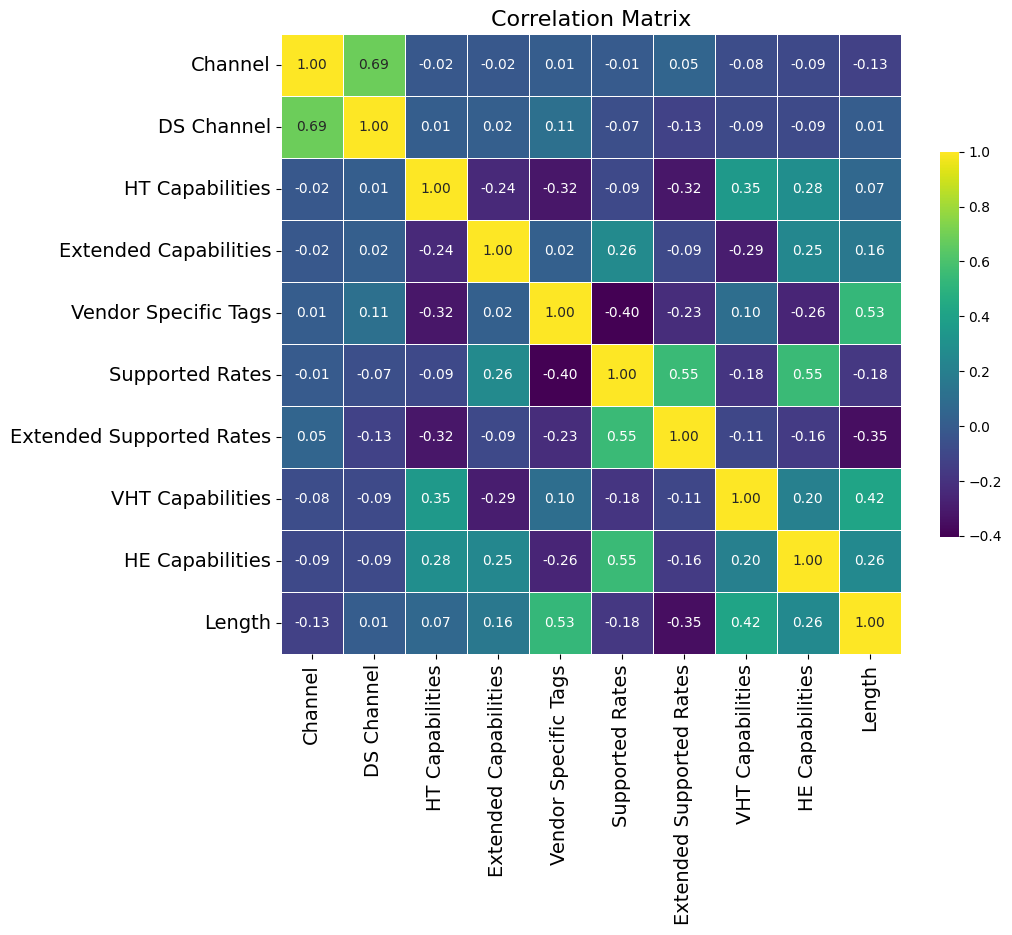

In [10]:
plotHelper.plot_correlation_matrix(df)